# OpenCV Example
Following tasks should be accomplished in this notebook:
* Install OpenCV via pip
* Import it successfully
* Be able to load images from filesystem
* Display images inside jupyter notebook

In [6]:
#!pip install opencv-python

# Enable local imports
import sys
sys.path.append('/home/nbuser/library/lib')

In [5]:
import cv2
import numpy as np
from PIL import Image
import logging
from helper import OpenCVHelper

# Try out local import
hlp = OpenCVHelper()

Loaded OpenCV Helper


In [9]:
_logger = logging.getLogger(__name__)

## Convert to PIL Image
By returning a PIL Image it automatically gets displayed to Jupyter notebook

In [10]:
def display_image(image, resize_factor=None):
    """
    Display a cv2 image by converting it to PIL and calling the display() function.
    This is a workaround for Jupyter Notebook as it doesnt support cv2.imshow()
    
    :param np_array img: cv2 Image data
    """
    # pil images
    if Image.isImageType(image):
            out = image

    # cv2 images
    elif isinstance(image, np.ndarray):
        if isinstance(image[0][0], np.uint8):
            _io = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        elif isinstance(image, np.ndarray) and len(image[0][0]) == 3:
            _io = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        elif isinstance(image, np.ndarray) and len(image[0][0]) == 4:
            _io = cv2.cvtColor(image, cv2.COLOR_BGRA2RGB)
        else:
            _io = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
        out = Image.fromarray(_io)

    # path to image
    elif isinstance(image, str):
        out = Image.open(image)

    if resize_factor:
        width, height = out.size
        _logger.info("Resizing by factor %s" % resize_factor)
        out = out.resize((int(width * resize_factor), int(height * resize_factor)), Image.ANTIALIAS)
    
    return out

**Testing Conversion and Display function**

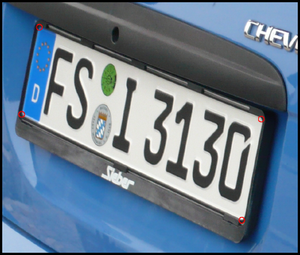

In [11]:
img = cv2.imread(r"./res/kennzeichen.png")
display_image(img, resize_factor=0.75)

In [ ]:
pass